# Workshop Redes Neurais
## Grupo Turing

### Proposta de roteiro para o nb (deletar depois)

#### O que deve ser falado antes do nb?
- Introdução à redes neurais
- estrutura geral de uma rede neural (talvez falar que é parecido com uma regressão logística?)
- computation graph (talvez?)
- forward propagation
- back propagation (se falar de fp acho que é a sequência lógica)
- optimizaçaõ e gradient descent

#### Conteúdos do nb
- Básico de Pytorch
  - comparação com np
  - operações básicas
  - Variables (falar de back propagation?)
- Implementando uma NN
  - Implementar uma regressão logística (?)
  - Implementar NN
  - Falar sobre CNN e LSTM (?)
  
**Obs: ** Ainda é preciso deixar o NB mais bonito, mais imagens e talvez melhorar a estrura dos exemplos.

## Básicos de Pytorch

Primeiro vamos ver alguns análogos entre **numpy** e **Pytorch**

### Matrizes
 - Em Pytorch, matrizes (*arrays*) são chamados de tensores.
 - Uma matriz $3\times3$, por exemplo é um tensor $3\times3$
 - Podemos criar um array numpy com o método `np.numpy()`
 - Podemos pegar o tipo do array com `type()`
 - Podemos pegar o formato do *array* com `np.shape()`. Linha $\times$ Coluna

In [1]:
import numpy as np
import math

array = [[1,2,3],[4,5,6]]
primeiro_array = np.array(array) # array 2x3
print(f"Array do tipo: {type(primeiro_array)}")
print(f"Array de formato: {np.shape(primeiro_array)}")
print(primeiro_array)

Array do tipo: <class 'numpy.ndarray'>
Array de formato: (2, 3)
[[1 2 3]
 [4 5 6]]


- Criamos um tensor com o método `torch.Tensor()`
- `tensor.type`: tipo do *array*, nesse caso um tensor
- `tensor.shape`: formato do *array*. Linha $\times$ Coluna 

In [2]:
import torch

tensor = torch.Tensor(array)
print(f"Array do tipo: {tensor.type}")
print(f"Array de formato: {tensor.shape}")
print(tensor)

Array do tipo: <built-in method type of Tensor object at 0x7fcc33f6b1c0>
Array de formato: torch.Size([2, 3])
tensor([[1., 2., 3.],
        [4., 5., 6.]])


Podemos fazer a alocação de *arrays* de maneira análoga nas duas linguagens:
 - `np.ones()` = `torch.ones()`
 - `np.random.rand()` = `torch.rand()`

In [3]:
print(f"Numpy:\n {np.ones((2,3))}\n")

print(torch.ones((2,3)))

Numpy:
 [[1. 1. 1.]
 [1. 1. 1.]]

tensor([[1., 1., 1.],
        [1., 1., 1.]])


In [4]:
print(f"Numpy:\n {np.random.rand(2,3)}\n")

print(torch.rand(2,3))

Numpy:
 [[0.82725762 0.1715352  0.27674921]
 [0.28980857 0.4825568  0.94322397]]

tensor([[0.1335, 0.9455, 0.0791],
        [0.9499, 0.2731, 0.4527]])


### Convertendo de numpy para torch e vice-versa

Em muitos pontos **numpy** e **pytorch** são bem parecidos em suas estruturas, e muitas das vezes podemos utilizar os dois em conjunto. Assim normalmente convertemos resultados de redes neurais - que são tensores - para **arrays** de **numpy**.

Os métodos para fazer a conversão entre tensores e arrays numpy:
 - `torch.from_numpy()`: de um array numpy para um tensore
 - `numpy()`: de um tensor para um array numpy

In [5]:
array = np.random.rand(2,2)
print(f"{type(array)} \n {array} \n")

de_numpy_para_tensor = torch.from_numpy(array)
print(f"{de_numpy_para_tensor} \n")

tensor = de_numpy_para_tensor
de_tensor_para_numpy = tensor.numpy()
print(f"{type(de_tensor_para_numpy)} \n {de_tensor_para_numpy}")

<class 'numpy.ndarray'> 
 [[0.09351619 0.99599026]
 [0.73997206 0.85712222]] 

tensor([[0.0935, 0.9960],
        [0.7400, 0.8571]], dtype=torch.float64) 

<class 'numpy.ndarray'> 
 [[0.09351619 0.99599026]
 [0.73997206 0.85712222]]


Quando fazemos estas conversões também podemos fazer um *typecast* (mudagem do tipo) das variáveis, isso pode ser útil já que o Pytorch faz uma série de computações de baixo nível, o qual o tipo primitivo das variáveis precisa ser bem especificado e definido, para isso podemos usar o método `tensor.type(torch.TipoDeTensor)`, alguns tipode de tensores nativos do Pytorch são:
  - `torch.FloatTensor` - pontos flutuantes de 32-bits
  - `torch.DoubleTensor` - pontos flutuantes de 64-bits
  - `torch.IntTensor` - números inteiros de 32-bits
  - `torch.LongTensor` - númeos inteiros de 64-bits
É muito comum encontrarmos *bugs* causados pela utilização errada de algum tipo primitivo, você pode ler sobre todos eles na [documentação do Pytorch](https://pytorch.org/docs/stable/tensors.html)

In [6]:
array = np.array([[1,10],[2,20]])

# Transformar em um tensor de Floats:
tensor_float = torch.from_numpy(array).type(torch.FloatTensor)
print(f"{type(tensor_float)} \n {tensor_float}\n")

# Transformar em um tensor de Longs:
tensor_long = torch.from_numpy(array).type(torch.LongTensor)
print(f"{type(tensor_long)} \n {tensor_long}")

<class 'torch.Tensor'> 
 tensor([[ 1., 10.],
        [ 2., 20.]])

<class 'torch.Tensor'> 
 tensor([[ 1, 10],
        [ 2, 20]])


### Matemática básica com Pytorch
*considere a e b dois tensores*

- Redefinir o tamanho: `view()`
- Adição: `torch.add(a,b)` = a + b
- Subtração: `a.sub(b)` = a - b
- Multiplicação elemento-a-elemento = `torch.mul(a,b)` = a * b
- Divisão elemento-a-elemento = torch.div(a,b) = a / b
- Média: a.mean()
- Desvio Padrão (Standart Deviantion - std): a.std()

In [7]:
tensor = torch.ones(3,3)
print("\n", tensor, "\n")

print(f"{tensor.view(9).shape}: {tensor.view(9)} \n")

print(f"Adição: \n{torch.add(tensor, tensor)} \n")

print(f"Subtração: \n{torch.sub(tensor, tensor)} \n")

print(f"Multiplicação elemento-a-elemento: \n{torch.mul(tensor, tensor)} \n")

print(f"Divisão elemento-a-elemento: \n{torch.div(tensor, tensor)} \n")

tensor = torch.Tensor([1,2,3,4,5])
print(f"Média: {tensor.mean()} \n")

print(f"Desvio padrão: {tensor.std()} \n")


 tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]) 

torch.Size([9]): tensor([1., 1., 1., 1., 1., 1., 1., 1., 1.]) 

Adição: 
tensor([[2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.]]) 

Subtração: 
tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]) 

Multiplicação elemento-a-elemento: 
tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]) 

Divisão elemento-a-elemento: 
tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]) 

Média: 3.0 

Desvio padrão: 1.5811388492584229 



### Variáveis

- Acumulam os gradientes
- Na rede neural utilizaremos pytorch. Como explicamos anteriormente nas, redes neurais os gradientes são calculados na *backpropagation*.
- A diferença entre variáveis e tensores é a de que variáveis acumulam os gradientes
- Também podemos fazer operações matemáticas com variáveis
- Dessa maneira, se queremos fazer a *backpropagation* precisamos de variáveis

In [8]:
from torch.autograd import Variable

var = Variable(torch.ones(3), requires_grad = True)
var

tensor([1., 1., 1.], requires_grad=True)

Vamos ver um exemplo de como as Variávies são utilizadas em uma *backpropagation*, com duas função $f(y) = \sum y$, $y(x) = x^2$ e $x = (3,5)$

In [9]:
array = [3,5]
tensor = torch.Tensor(array)
x = Variable(tensor, requires_grad = True)
y = x**2
print(f" x = {x}")

f = sum(y)
print(f" f =  {f}")

f.backward() # Realiza as derivadas parciais

print(f"Gradientes: {x.grad}")

 x = tensor([3., 5.], requires_grad=True)
 f =  34.0
Gradientes: tensor([ 6., 10.])


Vamos explicar passo a passo quais foram as operações feitas pelo Pytorch:
- Primeiro ele recebe os elementos do tensor e faz a primeira operação com eles $y_1 = 3^2 = 9$ e $y_2 = 5^2 = 25$
- Agora ele soma o tensor, retornando assim um único valor escalar: $\sum_i y_i = y_1 + y_2 = 9 + 25 = 34$
- O gradiente é a derivada parcial de cada elemento, ou seja o gradiente "1" é a derivada relativa à $y_1$ e o gradiente "2" é relativo à $y_2$ 
- derivada relativa à $y_1$ é $\frac{\partial}{\partial y_1}(3^2) = 2*3 = 6$
- derivada relativa à $y_2$ é $\frac{\partial}{\partial y_2}(5^2) = 2*5 = 10$
- Assim ficamos com os gradientes $(6, 10)$

### Exercícios

Coplete às células de código abaixo no campo indicado por "...":

Crie um tensor com base no *array* dado:

In [10]:
array = [[10,100,1000], [20,200,2000]]
tensor = "..."
tensor

'...'

Crie um tensor de formato $(5,3)$ no qual todos os elementos são o número 1, depois utilize o método `.shape` para verificar seu formato:

In [11]:
tensor_de_uns = "..."
formato_do_tensor = "..."

print(f"Tensor: \n {tensor_de_uns}")
print(f"Formato: {formato_do_tensor}")

Tensor: 
 ...
Formato: ...


Converta o *array* numpy para um tesnor de pytorch, depois transforme o tesnor em um *array* numpy novamente.

In [12]:
array = np.array([[1,1,2,3], [5,8,13,21]])

de_numpy_para_tensor = "..."
print(f"{de_numpy_para_tensor} \n É um tensor? {isinstance(de_numpy_para_tensor, torch.Tensor)}")

de_tensor_para_numpy = "..."
print(f"{de_tensor_para_numpy} \n É um array numpy? {isinstance(de_tensor_para_numpy, np.ndarray)}")

... 
 É um tensor? False
... 
 É um array numpy? False


Complete a célula abaixo com as operações indicadas:

In [13]:
tensor_a = torch.Tensor([[5,8],[5,4]])
tensor_b = torch.Tensor([[10,16],[10,8]])

soma = "..." # a+b
subtracao = "..." # b-a
mul = "..." # a*b
div = "..." # b/a
media = "..." # media de a
std = "..." # desvio padrão de b

print(f"Soma: {soma} \n"
      f"Subtração: {subtracao} \n"
      f"Multiplicação: {mul} \n"
      f"Divisão: {div} \n"
      f"Média: {media} \n"
      f"Desvio Padrão: {std} \n")

Soma: ... 
Subtração: ... 
Multiplicação: ... 
Divisão: ... 
Média: ... 
Desvio Padrão: ... 



Crie uma **Varíavel** do pytorch com o tensor definido. Depois defina as equações $y = log_e(x)$ e $f(y) = 2*media(y)$. Para então aplicar a *backpropagation* em $f(x)$ e calcular seus gradientes.

In [14]:
array = [4,5]
tensor = torch.Tensor(array)

x = "..."
print(f" x = {x}")

y = "..." # Dica: use o operador torch.log()
print(f" y = {y}")

f = "..."
print(f" f = {f}")

# Escreva aqui a backpropagation de f

if isinstance(x, torch.Tensor): print(f"Gradientes: {x.grad}")
else: print("Complete o exerćicio!")

 x = ...
 y = ...
 f = ...
Complete o exerćicio!


## Implementando uma rede neural
### Conhecendo e preparando nossos dados 

**[Fashion MNIST](https://www.kaggle.com/zalando-research/fashionmnist)** é uma coleção de diversas peças de roupas retiradas do serviço de *e-commerce* Zalando, ele consiste de cerca de 60.000 entradas de treino de 10.000 de teste. Cada entrada é uma imagem de 28x28 pixels em escala cinza. As peças de roupa estão classificadas da seguinte maneira:
  - 0 *T-shirt*
  - 1 *Trouser*
  - 2 *Pullover*
  - 3 *Dress*
  - 4 *Coat*
  - 5 *Sandal*
  - 6 *Shirt*
  - 7 *Sneaker*
  - 8 *Bag*
  - 9 *Ankle boot*

In [15]:
import pandas as pd

df_inicial = pd.read_csv("fashion-mnist_train.csv")
df_inicial.head() # Como cada coluna representa o valor de cada pixel, a tabela dos dados não é muito "emocionante"

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
n_validos = 10000
n_treino = len(df_inicial) - n_validos
print(f"Número de entradas de treino: {n_treino}\n"
      f"Número de entradas de validação: {n_validos}")

Número de entradas de treino: 50000
Número de entradas de validação: 10000


In [17]:
# Usaremos essa função para dividir entre dados de treino e validação
def divide_valores(a,n):
     return a[:n].copy(), a[n:].copy()

In [18]:
# Dividir dataset entre dados x e labels y
y, x = df_inicial["label"].values, df_inicial.loc[:, df_inicial.columns != "label"].values

In [19]:
x_treino, x_valido = divide_valores(x, n_treino)
y_treino, y_valido = divide_valores(y, n_treino)

In [20]:
print(f"Formato do x de treino: {x_treino.shape}\n"
      f"Formato do x de validação: {x_valido.shape}\n"
      f"Formato do y de treino: {y_treino.shape}\n"
      f"Formato do y de validação: {y_valido.shape}")

Formato do x de treino: (50000, 784)
Formato do x de validação: (10000, 784)
Formato do y de treino: (50000,)
Formato do y de validação: (10000,)


Uma etapa comum de pré processamento de dados em aprendizado por máquina é centralizar padronizar nosso *dataset*, o que isso basicamente significa é que iremos subtrair a média de todo o *dataset* e dividi-lo pelo seu desvio padrão. Esse processo ajuda a agilizar o processo de aprendizado.

In [21]:
media = x_treino.mean()
desvio_padrao = x_treino.std()

x_treino = (x_treino-media)/desvio_padrao
print(f"Média antes do pré processamento: {media:.2f}\n"
      f"Desvio padrão antes do pré processamente: {desvio_padrao:.2f}\n"
      f"Média depois do pré processamento: {x_treino.mean():.2f}\n"
      f"Desvio padrão depois do pré processamento: {x_treino.std():.2f}")

Média antes do pré processamento: 72.86
Desvio padrão antes do pré processamente: 89.89
Média depois do pré processamento: -0.00
Desvio padrão depois do pré processamento: 1.00


In [22]:
# O mesmo deve ser feito com a validação

x_valido = (x_valido-media)/desvio_padrao
print(f"Média pós processamento: {x_valido.mean():.2f}\n"
      f"Desvio padrão pós processamento: {x_valido.std():.2f}")

Média pós processamento: 0.01
Desvio padrão pós processamento: 1.01


Vamos visualizar algumas das imagens de nosso *dataset*:

In [23]:
from matplotlib import pyplot as plt

# Essa função vai nos ajudar a visualizar as imagens
def mostrar(img, title=None):
    labels = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
    plt.imshow(img, cmap="gray")
    if title is not None: plt.title(labels[int(title)])

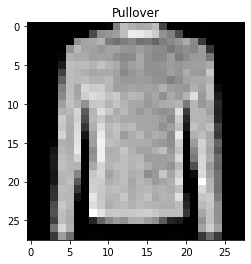

In [24]:
x_imgs = np.reshape(x_valido, (-1, 28, 28))

index = 100
mostrar(x_imgs[index], y_valido[index])

### Começando com uma regressão logística

Dizemos que uma regressão linear é basicamente uma maneira de visualizar nossos dados em uma "linha" e que a partir dessa linha podemos fazer algumas predições sobre dados futuros.

Porém, regressões lineares não são muito boas com classificações, para isso utilizaremos uma regressão logística.

Uma regressão logística é uma regressão linear que utiliza a função **softmax** como uma **função de ativação**:
$$
a_i = \frac{e^{x+i}}{\sum_{j=1}^n e^{x_j}}
$$

> **Obs:** O que a função **softmax** basicamente faz é receber um vetor (lista) de valores numéricos e os transforma em valores probabilísticos. Em outras palavras, quanto maior for o valor da preferência daquela patâmetro, depois que essa lista de valores passar pela função Softmax, maior será sua probabilidade.

É interessante primeiro estudarmos a regressão logística antes de vermos uma rede neural pois a regressão logística é basicamente uma rede neural simples!

![Grafo de Regressão logística](./imgs/diagrama_logreg.png)

In [25]:
import torch
import torch.nn as nn
from torch.autograd import Variable
from torch.utils.data import DataLoader

In [26]:
class RegressaoLogistica(nn.Module):
    def __init__ (self, input_dim, output_dim):
        super(RegressaoLogistica, self).__init__()  # Já que será "filho" de nn.Module, temos que iniciar seu "pai"

        self.linear = nn.Sequential(
            nn.Linear(input_dim, output_dim), # Parte linear
            nn.LogSoftmax()                   # A parte logística
        )

    def forward(self, x):
        y = self.linear(x)
        return y

erro = nn.NLLLoss() # Função de perda (loss)

input_dim = 28*28 # Dica, olhe na especificação do problema
output_dim = 10

# Inicialize a Regressão Logística com as dimensões de input e output estabelecidas
modelo = RegressaoLogistica(input_dim, output_dim) 

# Aqui escolhemos nosso optimizador, que nesse caso será o Stochastic gradient descent, 
# que estará optimizando os parâmetros de nossa regrssão linear.
taxa_aprendizado = 0.001
optmizador = torch.optim.SGD(modelo.parameters(), lr=taxa_aprendizado)

Vamos agora treinar nosso modelo:

In [27]:
# Transforme os respectivos datasets de numpy para tensores torch, 
# o tensor x_treino_torch deve ser do tipo torch.FloatTensor
# Dica, lembre-se da seção "Convertendo de numpy para torch e vice-versa"
x_treino_torch = torch.from_numpy(x_treino).type(torch.FloatTensor)
y_treino_torch = torch.from_numpy(y_treino)

x_valido_torch = torch.from_numpy(x_valido).type(torch.FloatTensor)
y_valido_torch = torch.from_numpy(y_valido)

tamanho_batch = 100
n_iters = 10000

n_epochs = int((n_iters / len(y_treino)) * tamanho_batch)

# Transformamos em um dataset de tensores
treino = torch.utils.data.TensorDataset(x_treino_torch, y_treino_torch)
validacao = torch.utils.data.TensorDataset(x_valido_torch, y_valido_torch)

# Preparamos o dataser para ser iterado pela rede
treino_loader = DataLoader(treino, batch_size=tamanho_batch, shuffle=False)
validacao_loader = DataLoader(validacao, batch_size=tamanho_batch, shuffle=False)

### Para que serviu o TensorDataset e o DataLoader?

Basicamente, o que eles fazem é transformar nosso conjunto de tensores (que antes eram arrays numpy) em algo iterável, ou seja, que podemos percorrer por com um loop, além disso, já os dividimos em levas (*batchs*) de 100 serão alimentados na nossa rede. Vamos dar uma olhada em como está estruturado nosso `treino_loader`:

In [28]:
for i in treino_loader:
    print(i)

    [-0.8106, -0.8106, -0.8106,  ..., -0.8106, -0.8106, -0.8106],
        [-0.8106, -0.8106, -0.8106,  ..., -0.8106, -0.8106, -0.8106],
        [-0.8106, -0.8106, -0.8106,  ..., -0.8106, -0.8106, -0.8106]]), tensor([7, 6, 3, 4, 4, 9, 7, 9, 6, 5, 7, 4, 4, 7, 9, 1, 6, 9, 4, 7, 5, 4, 0, 9,
        0, 1, 5, 8, 7, 6, 5, 4, 1, 2, 9, 5, 0, 6, 3, 2, 5, 7, 3, 5, 1, 9, 1, 0,
        6, 4, 8, 8, 5, 0, 8, 2, 4, 3, 7, 2, 1, 4, 2, 8, 1, 9, 0, 9, 7, 3, 5, 9,
        4, 9, 3, 2, 9, 4, 4, 6, 3, 9, 8, 6, 4, 8, 1, 5, 8, 2, 1, 6, 0, 9, 1, 3,
        2, 9, 8, 4])]
[tensor([[-0.8106, -0.8106, -0.8106,  ..., -0.8106, -0.8106, -0.8106],
        [-0.8106, -0.8106, -0.8106,  ..., -0.8106, -0.8106, -0.8106],
        [-0.8106, -0.8106, -0.8106,  ..., -0.8106, -0.8106, -0.8106],
        ...,
        [-0.8106, -0.8106, -0.8106,  ..., -0.8106, -0.8106, -0.8106],
        [-0.8106, -0.8106, -0.8106,  ...,  0.3575, -0.8106, -0.8106],
        [-0.8106, -0.8106, -0.8106,  ..., -0.8106, -0.8106, -0.8106]]), tensor([3, 6, 

In [29]:
len(treino_loader)

500

Aqui podemos observar que nosso treino_loader é composto de 500 pares de tensores, vamos olhar melhor cada um desses tensores:

In [30]:
for i in treino_loader:
    print(f"Tensor de imagens: {i[0]}\n"
          f"Tamanho do Tensor: {len(i[0])}\n"
          f"Imagem tensor: {i[0][0]}\n"
          f"Tamanho da imagem tensor: {len(i[0][0])}\n"
          f"------------------------------------------")

.4309e-01, -2.8771e-01, -7.8832e-01,  1.5727e-01, -3.6559e-01,
        -6.6595e-01, -4.3233e-01, -8.1057e-01,  3.4639e-01,  2.3514e-01,
        -4.2121e-01, -4.5458e-01,  1.4700e+00, -5.7695e-01,  6.8275e-02,
        -6.6595e-01, -8.1057e-01, -8.1057e-01, -8.1057e-01, -8.1057e-01,
        -8.1057e-01, -7.2157e-01, -7.7720e-01, -5.2133e-01,  5.4663e-01,
        -3.0996e-01, -4.7683e-01, -5.2133e-01, -2.5434e-01, -6.2145e-01,
         2.4627e-01,  9.9162e-01,  3.9089e-01, -9.8594e-02,  5.7150e-02,
        -8.1057e-01, -4.8796e-01, -2.5434e-01, -6.7707e-01, -8.1057e-01,
        -1.6534e-01, -8.1057e-01, -8.1057e-01, -8.1057e-01, -8.1057e-01,
        -8.1057e-01, -8.1057e-01, -8.1057e-01, -8.1057e-01, -8.1057e-01,
        -8.1057e-01, -8.1057e-01, -8.1057e-01, -4.7683e-01, -5.1021e-01,
        -3.4334e-01, -1.9872e-01, -5.7695e-01,  3.4639e-01,  7.4688e-01,
         7.8025e-01, -2.4321e-01, -2.9884e-01, -5.8808e-01, -5.8808e-01,
        -5.1021e-01, -6.1033e-01, -7.4382e-01, -8.1057e-01, -

Aqui pode-se notar que o primeiro tensor do par é um tensor em que cada elemento é um batch de 100 imagens-tensor. Vamos olhar o segundo elemento do par:

In [31]:
for i in treino_loader:
    print(f"Tensor de labels: {i[1]}\n"
          f"Tamanho do Tensor: {len(i[1])}\n"
          f"Label: {i[1][0]}\n"
          f"------------------------------------------")

-----------------------------------
Tensor de labels: tensor([1, 7, 8, 8, 8, 3, 7, 4, 6, 0, 9, 2, 0, 0, 7, 2, 6, 5, 3, 8, 8, 6, 5, 6,
        1, 0, 6, 1, 4, 5, 4, 0, 3, 4, 6, 9, 2, 1, 5, 2, 2, 3, 3, 4, 3, 9, 0, 8,
        5, 1, 6, 7, 5, 3, 9, 0, 6, 4, 7, 6, 1, 4, 3, 7, 7, 5, 8, 9, 7, 3, 6, 7,
        9, 6, 0, 7, 1, 4, 7, 1, 3, 7, 8, 5, 8, 4, 5, 4, 5, 5, 8, 6, 3, 0, 4, 6,
        1, 7, 2, 7])
Tamanho do Tensor: 100
Label: 1
------------------------------------------
Tensor de labels: tensor([5, 8, 3, 0, 3, 6, 6, 6, 6, 6, 3, 9, 6, 4, 1, 4, 8, 8, 9, 6, 5, 9, 9, 1,
        8, 8, 5, 6, 6, 4, 5, 7, 8, 4, 4, 9, 5, 2, 6, 4, 3, 7, 8, 5, 3, 7, 3, 8,
        9, 2, 9, 6, 3, 9, 1, 9, 2, 7, 3, 1, 4, 3, 3, 3, 7, 4, 4, 0, 1, 5, 3, 9,
        9, 0, 8, 8, 4, 1, 3, 1, 3, 3, 4, 0, 4, 1, 5, 9, 4, 2, 7, 9, 9, 2, 7, 9,
        6, 5, 6, 6])
Tamanho do Tensor: 100
Label: 5
------------------------------------------
Tensor de labels: tensor([7, 8, 9, 7, 8, 7, 2, 4, 3, 2, 5, 2, 4, 9, 5, 5, 1, 7, 5, 4, 9, 9, 7, 3

Aqui pode-se notar que o segundo tensor do par é um tensor em que cada elemento é um batch de 100 classificações.

In [32]:
contagem = 0
lista_loss = []
lista_iteracao = []
for epoch in range(n_epochs):
    for imagens, classificacao in treino_loader:
        
        # Utilizando a função Variable() crie as seguintes variáveis:
        treino = Variable(imagens.view(-1, 28*28)) # Crie uma variável com as imagens, porém, mude a forma do tensor
                                                   # para ([100,28*28]) com o método .view()
        
        validacao = Variable(classificacao)     # Cire uma variável com a classificacao

        # Limpamos os gradientes
        optmizador.zero_grad()

        # Utilize o método .forward() do modelo utilizando a variável de treino
        # para realizarmos a forward propagation
        outputs = modelo(treino) 

        # Utilize a função de perda erro() com nosso output e a variável de verificação
        loss = erro(outputs, validacao)

        # Realizamos a backward propagation
        loss.backward()

        # Atualiza os parâmetros
        optmizador.step() 

        contagem += 1

        # Predições
        if contagem % 50 == 0:
            # Calculamos a acurácia
            corretos = 0
            total = 0

            for imagens, classificacao in treino_loader:
                
                # Crie uma variável com as imagens da mesma maneira como na variável de treino
                teste = Variable(imagens.view(-1, 28*28))

                # Forward propagation
                outputs = modelo(teste)
                
                # Recebe as predições do valor máximo
                predito =  torch.max(outputs.data, 1)[1]

                # Número total de classificações
                total += len(classificacao)

                # Número de predições corretas
                corretos += (predito == classificacao).sum()

            acuracia = 100 * corretos / float(total)

            # Armazena a loss e iteração
            lista_loss.append(loss.data)
            lista_iteracao.append(contagem)

        if contagem % 500 == 0:
            # Printa a loss
            print(f"Iteração: {contagem} | Loss: {loss.data} | Acurácia: {acuracia}")

Iteração: 500 | Loss: 0.9487448334693909 | Acurácia: 73.19400024414062
Iteração: 1000 | Loss: 0.8579804301261902 | Acurácia: 76.09400177001953
Iteração: 1500 | Loss: 0.8200242519378662 | Acurácia: 77.63999938964844
Iteração: 2000 | Loss: 0.7977936267852783 | Acurácia: 78.69999694824219
Iteração: 2500 | Loss: 0.782673716545105 | Acurácia: 79.43399810791016
Iteração: 3000 | Loss: 0.7714732885360718 | Acurácia: 79.98200225830078
Iteração: 3500 | Loss: 0.7626940011978149 | Acurácia: 80.41000366210938
Iteração: 4000 | Loss: 0.7555271983146667 | Acurácia: 80.83200073242188
Iteração: 4500 | Loss: 0.7494957447052002 | Acurácia: 81.16600036621094
Iteração: 5000 | Loss: 0.7443002462387085 | Acurácia: 81.50399780273438
Iteração: 5500 | Loss: 0.7397421002388 | Acurácia: 81.75599670410156
Iteração: 6000 | Loss: 0.7356856465339661 | Acurácia: 81.99600219726562
Iteração: 6500 | Loss: 0.732033908367157 | Acurácia: 82.22000122070312
Iteração: 7000 | Loss: 0.7287164330482483 | Acurácia: 82.3619995117187

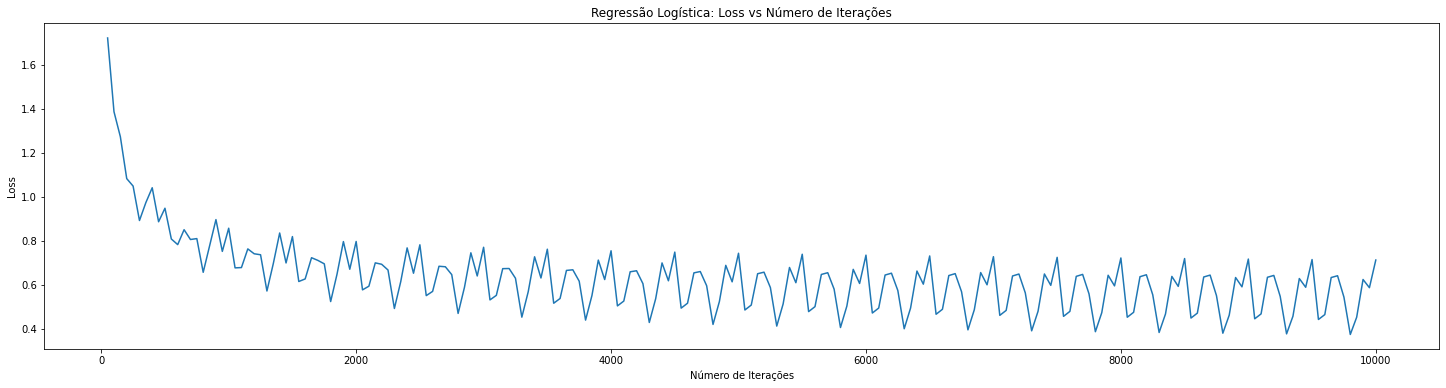

In [33]:
plt.figure(figsize=(25,6))
plt.plot(lista_iteracao,lista_loss)
plt.xlabel("Número de Iterações")
plt.ylabel("Loss")
plt.title("Regressão Logística: Loss vs Número de Iterações")
plt.show()